#### Linear regression with raw data; features [‘age’, ‘children’, …] 

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression; 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
missing = pd.read_csv('insurance-missing.csv')
missing.head(), missing.columns

(   age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520,
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object'))

In [3]:
missing.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
missing_mean = missing.copy()
missing_mean['bmi'].fillna(missing_mean['bmi'].mean(), inplace=True)
missing_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


C:\Users\Jaq\AppData\Local\Temp\ipykernel_10996\3246353866.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  missing_mean['bmi'].fillna(missing_mean['bmi'].mean(), inplace=True)


In [6]:
X = missing_mean.drop(['sex','bmi', 'smoker', 'region', 'charges'],axis=1)
y = missing_mean['charges']
X, y

(      age  children
 0      19         0
 1      18         1
 2      28         3
 3      33         0
 4      32         0
 ...   ...       ...
 1333   50         3
 1334   18         0
 1335   18         0
 1336   21         0
 1337   61         0
 
 [1338 rows x 2 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [8]:
def metricScore(y_test, y_hat):
    print('R2 score is : ', r2_score(y_test, y_hat))
    print('Mean Squred Error  score is : ', mean_squared_error(y_test, y_hat))

In [9]:
lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
y_hat = lrModel.predict(X_test)
metricScore(y_test, y_hat)

R2 score is :  0.04225304958507703
Mean Squred Error  score is :  141012174.4510918


#### Pandas get.dummies()

In [10]:
X = missing_mean.drop(['charges'],axis=1)
y = missing_mean['charges']
X = pd.get_dummies(X, drop_first=True)
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [12]:
lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
y_hat = lrModel.predict(X_test)
metricScore(y_test, y_hat)

R2 score is :  0.7807316546587777
Mean Squred Error  score is :  32283586.13041105


### Introduction of OneHotEncoding

In [13]:
X = missing_mean.drop(['charges'],axis=1)
y = missing_mean['charges']

encoder = LabelEncoder()

X['sex'] = encoder.fit_transform(X['sex'])
X['smoker'] = encoder.fit_transform(X['smoker'])

In [14]:
X.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
new_cols = pd.get_dummies(X['region'])
X.drop(columns='region', axis=1, inplace=True)

In [16]:
X = pd.concat([X, new_cols], axis=1)
X.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,False,False,False,True
1,18,1,33.770,1,0,False,False,True,False
2,28,1,33.000,3,0,False,False,True,False
3,33,1,22.705,0,0,False,True,False,False
4,32,1,28.880,0,0,False,True,False,False


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
y_hat = lrModel.predict(X_test)
metricScore(y_test, y_hat)

R2 score is :  0.7807316546587777
Mean Squred Error  score is :  32283586.13041105


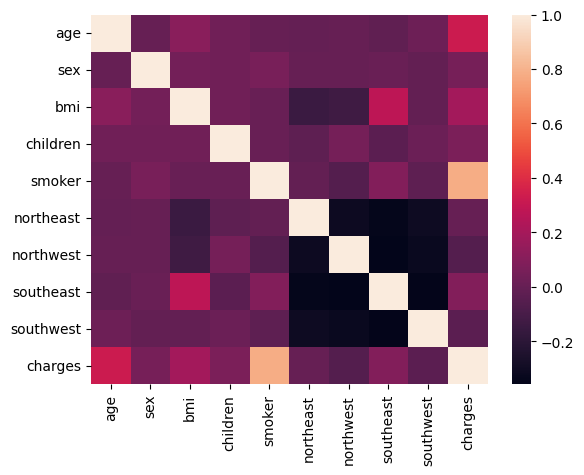

In [18]:
sns.heatmap(pd.concat([X_train,y_train],axis=1).corr())
plt.show()

### Introduction of new feature bmi categories

In [19]:
def bmi_category(bmi):
    transformed_list = []

    for index in bmi:
        if index < 18.5:
            transformed_list.append(1)
        elif index >= 18.5 and index <= 24.5:
            transformed_list.append(2)
        elif index >= 25 and index <= 29.5:
            transformed_list.append(3)
        else:
            transformed_list.append(4)

    return transformed_list

X['bmi'] = bmi_category(X.bmi.values)
X.tail()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
1333,50,1,4,3,0,False,True,False,False
1334,18,0,4,0,0,True,False,False,False
1335,18,0,4,0,0,False,False,True,False
1336,21,0,3,0,0,False,False,False,True
1337,61,0,3,0,1,False,True,False,False


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
y_hat = lrModel.predict(X_test)
metricScore(y_test, y_hat)

R2 score is :  0.7741877656397048
Mean Squred Error  score is :  33247064.02981477


#### Introduction of new feature life stage categories

In [21]:
def age_categories(ages):
    transformed_list = []

    for age in ages:
        if age <= 30:
            transformed_list.append(1)
        elif age < 60:
            transformed_list.append(2)
        else:
            transformed_list.append(3)

    return transformed_list

X['life_stage'] = age_categories(X.age.values)
X.head()                

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,life_stage
0,19,0,3,0,1,False,False,False,True,1
1,18,1,4,1,0,False,False,True,False,1
2,28,1,4,3,0,False,False,True,False,1
3,33,1,2,0,0,False,True,False,False,2
4,32,1,3,0,0,False,True,False,False,2


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
y_hat = lrModel.predict(X_test)
metricScore(y_test, y_hat)

R2 score is :  0.774413283752124
Mean Squred Error  score is :  33213860.27030756


#### Introduction of new feature Risk factor

In [23]:
def calculate_risk(life_stage, smoker, bmi):
    transformed_list = []
    counter = 0 

    if len(life_stage) == len(smoker):
        for stage, smoke in zip(life_stage, smoker):
            if (stage == 1) and (smoke == 1) and (bmi[counter] == 2):
                transformed_list.append(1)        
            elif (stage == 1) and (smoke == 1) and (bmi[counter] == 3):
                transformed_list.append(2)
            elif (stage == 2) and (smoke == 1) and (bmi[counter] == 2):
                transformed_list.append(3)
            elif (stage == 2) and (smoke == 1) and (bmi[counter] == 3):
                transformed_list.append(4)
            elif (stage == 3) and (smoke == 1) and (bmi[counter] == 2):
                transformed_list.append(5)
            elif (stage == 3) and (smoke == 1) and (bmi[counter] == 3):
                transformed_list.append(6)
            else:
                transformed_list.append(0)
            
            counter += 1
    
    return transformed_list

X['life_risk'] = calculate_risk(X.life_stage.values, X.smoker.values, X.bmi.values)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
y_hat = lrModel.predict(X_test)
metricScore(y_test, y_hat)

R2 score is :  0.8114456631711873
Mean Squred Error  score is :  27761463.53365635
